# Compare 0.3 vs 0.5 threshold for paper

After removing the jump it is still possible to have big jumps in the regularized data. 

In [6]:
# import warnings
# warnings.filterwarnings("ignore")

import csv
import numpy as np
import pandas as pd
# import geopandas as gpd
from IPython.display import Image
# from shapely.geometry import Point, Polygon
from math import factorial
import scipy
import scipy.signal
import os, os.path

from datetime import date
import datetime
import time

from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import LinearRegression
from patsy import cr

# from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sb

import sys

In [7]:
sys.path.append('/Users/hn/Documents/00_GitHub/Ag/remote_sensing/python/')
import remote_sensing_core as rc
import remote_sensing_plot_core as rcp

start_time = time.time()

In [10]:
data_dir = "/Users/hn/Documents/01_research_data/remote_sensing/data_for_plots_in_paper/"
write_dir = "/Users/hn/Documents/01_research_data/remote_sensing/data_for_plots_in_paper/"

param_dir = "/Users/hn/Documents/00_GitHub/Ag/remote_sensing/parameters/"

In [35]:
indeks = "EVI"

In [11]:
a_df = pd.read_csv(write_dir + "01_Regular_filledGap_Grant_SF_2017_EVI.csv", low_memory=False)

In [12]:
target_ID = "98574_WSDA_SF_2017"
one_field = a_df[a_df.ID == target_ID].copy()

one_field.sort_values(by=['image_year', 'doy'], inplace=True)

one_field.reset_index(drop=True, inplace=True)
one_field = one_field[one_field['EVI'].notna()]

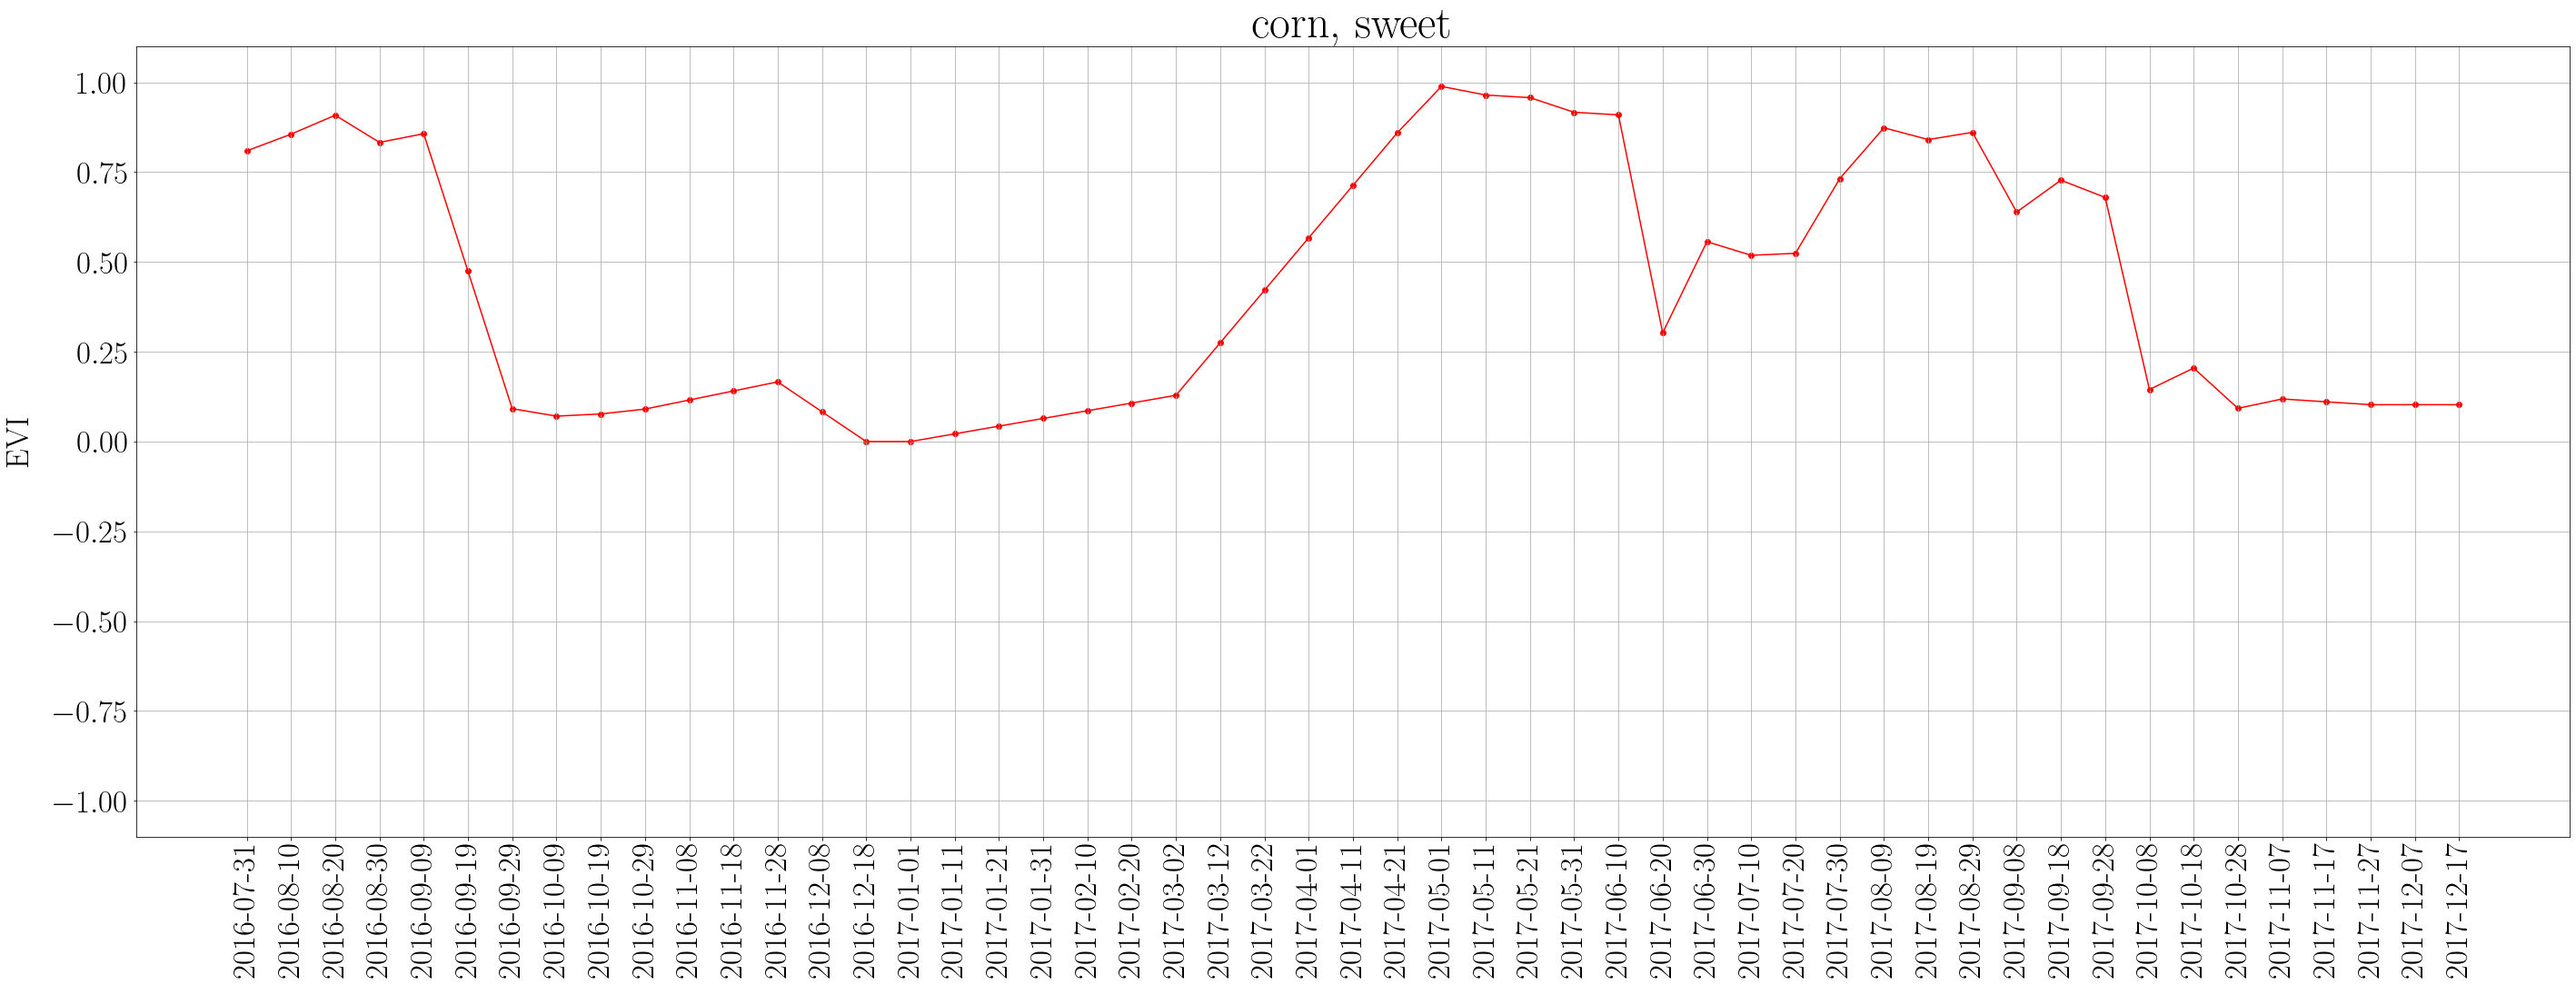

In [30]:
plt.rc('font', family = 'serif')
plt.rc('text', usetex = True)
plt.rc('xtick', labelsize = 35)
plt.rc('ytick', labelsize = 35) # x-small


fig, ax = plt.subplots(figsize=(48, 16));
plot_title = one_field.CropTyp.unique()[0]

ax.plot(one_field['Date'], one_field['EVI'], c='r')
ax.scatter(one_field['Date'], one_field['EVI'], marker='o', s=35, c='r')
ax.set_ylim([-1.1, 1.1])
# ax.set_xlim([min(one_field['Date']), max(one_field['Date'])/2])

ax.set_ylabel('EVI', fontsize = 35, labelpad = 20);
# ax.set_xlabel('date', fontsize = 35, labelpad = 20);
plt.xticks(rotation = 90)

ax.set_title(plot_title, fontsize = 50);
# ax.set(xlabel='date', ylabel='EVI')
# ax.legend(loc="best");
ax.grid(True)

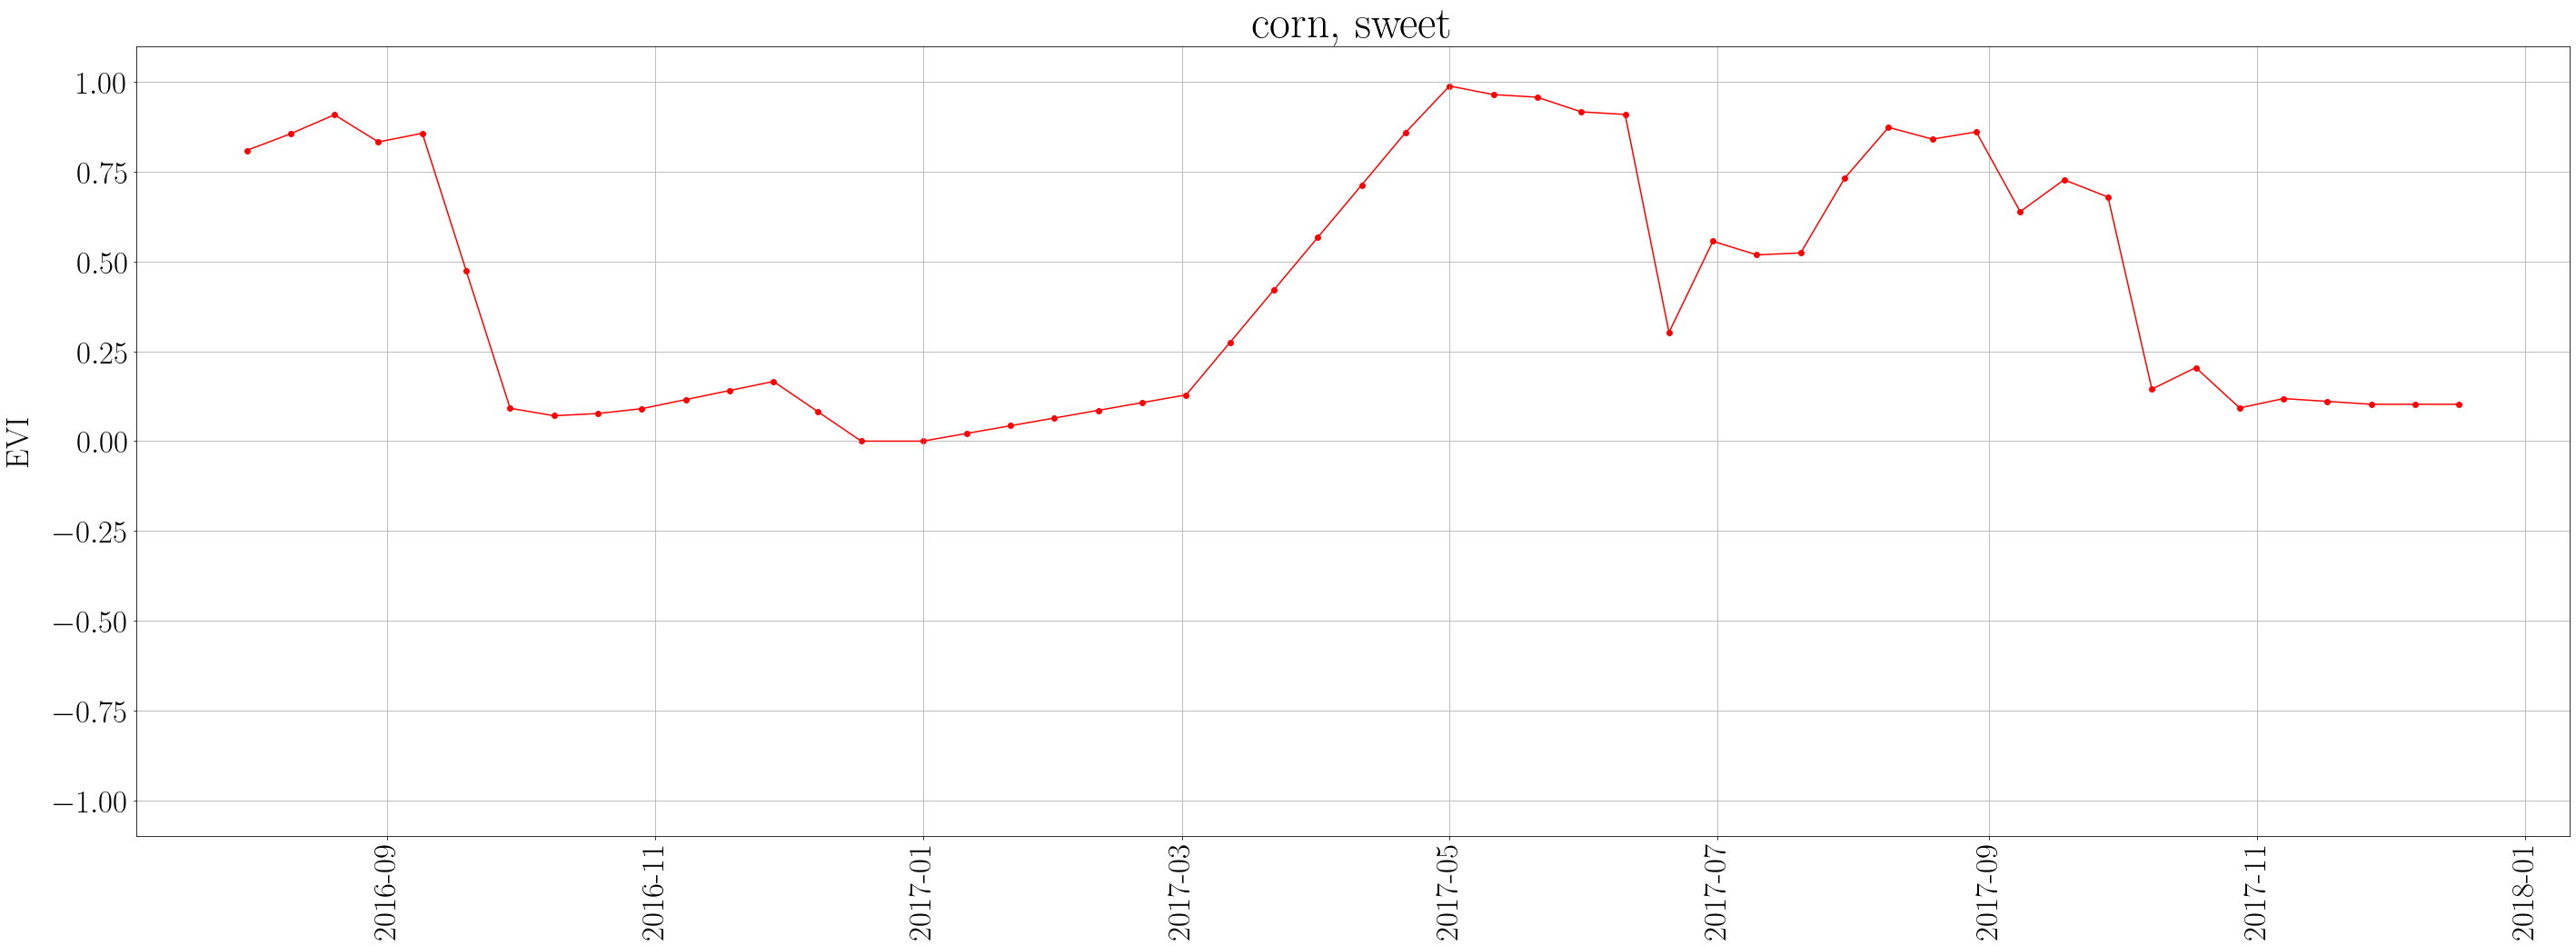

In [34]:
one_field['human_system_start_time'] = pd.to_datetime(one_field['image_year'] * 1000 + \
                                                      one_field['doy'], format='%Y%j')

one_field['Date'] = pd.to_datetime(one_field.human_system_start_time.values).values


fig, ax = plt.subplots(figsize=(48, 16));
plot_title = one_field.CropTyp.unique()[0]

ax.plot(one_field['Date'], one_field['EVI'], c='r')
ax.scatter(one_field['Date'], one_field['EVI'], marker='o', s=35, c='r')
ax.set_ylim([-1.1, 1.1])
ax.set_ylabel('EVI', fontsize = 35, labelpad = 20);
plt.xticks(rotation = 90)

ax.set_title(plot_title, fontsize = 50);

# ax.legend(loc="best");
ax.grid(True)

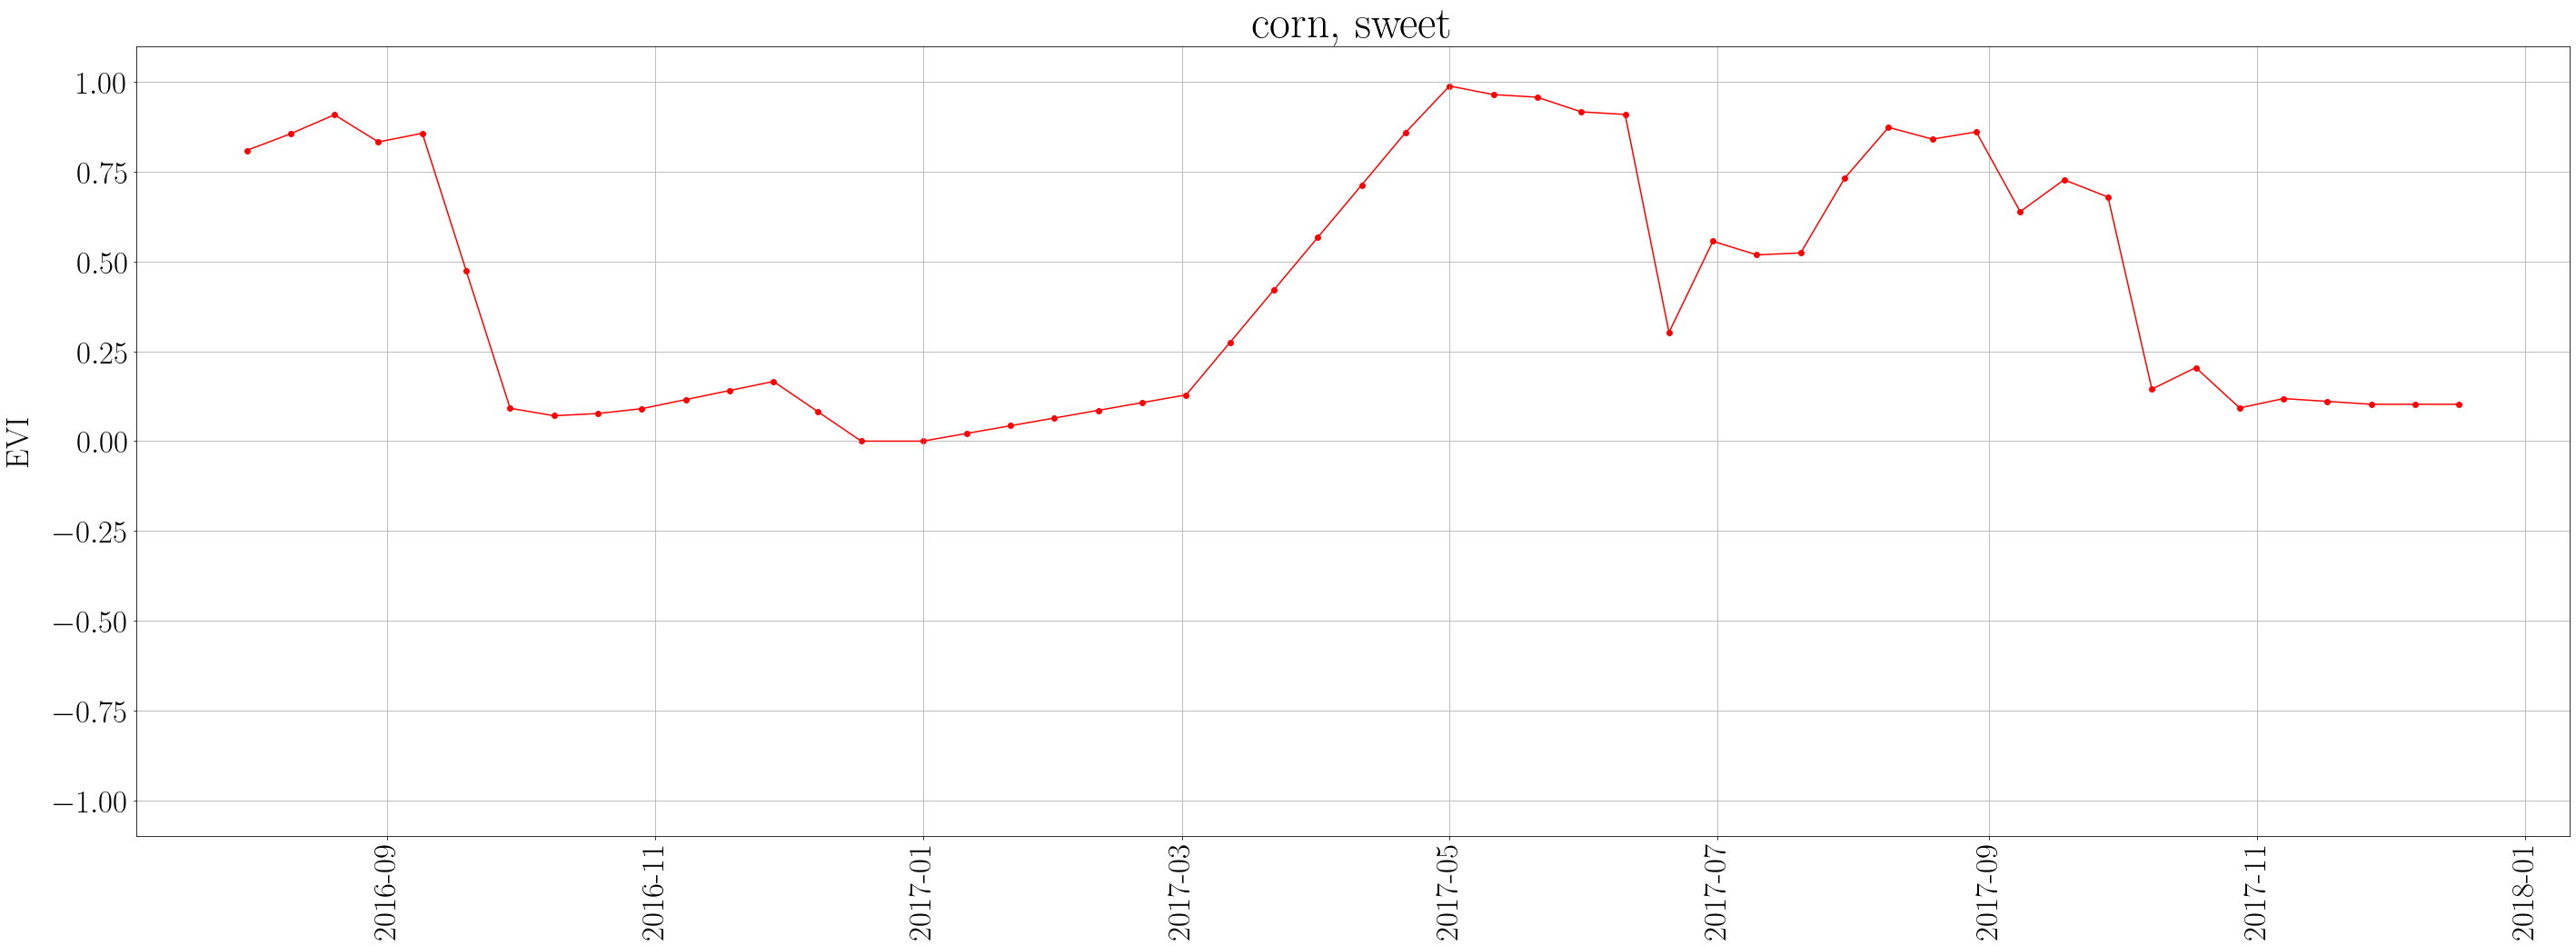

In [36]:
cleaned_field = rc.interpolate_outliers_EVI_NDVI(outlier_input = one_field , given_col = indeks)

fig, ax = plt.subplots(figsize=(38, 16));
plot_title = one_field.CropTyp.unique()[0]

ax.plot(one_field['Date'], one_field['EVI'], c='r')
ax.scatter(one_field['Date'], one_field['EVI'], marker='o', s=35, c='r')
ax.set_ylim([-1.1, 1.1])
ax.set_ylabel('EVI', fontsize = 35, labelpad = 20);
plt.xticks(rotation = 90)

ax.set_title(plot_title, fontsize = 50);

# ax.legend(loc="best");
ax.grid(True)

In [37]:
outlierRemoved_EVI_values = cleaned_field['EVI']
outlierRemoved_EVI_time = cleaned_field['Date']

cleaned_field = rc.correct_big_jumps_1DaySeries(dataTMS_jumpie = cleaned_field, 
                                                give_col = indeks, 
                                                maxjump_perDay = 0.015)

outlierJumpRemoved_EVI_values = cleaned_field['EVI']
outlierJumpRemoved_EVI_time = cleaned_field['Date']

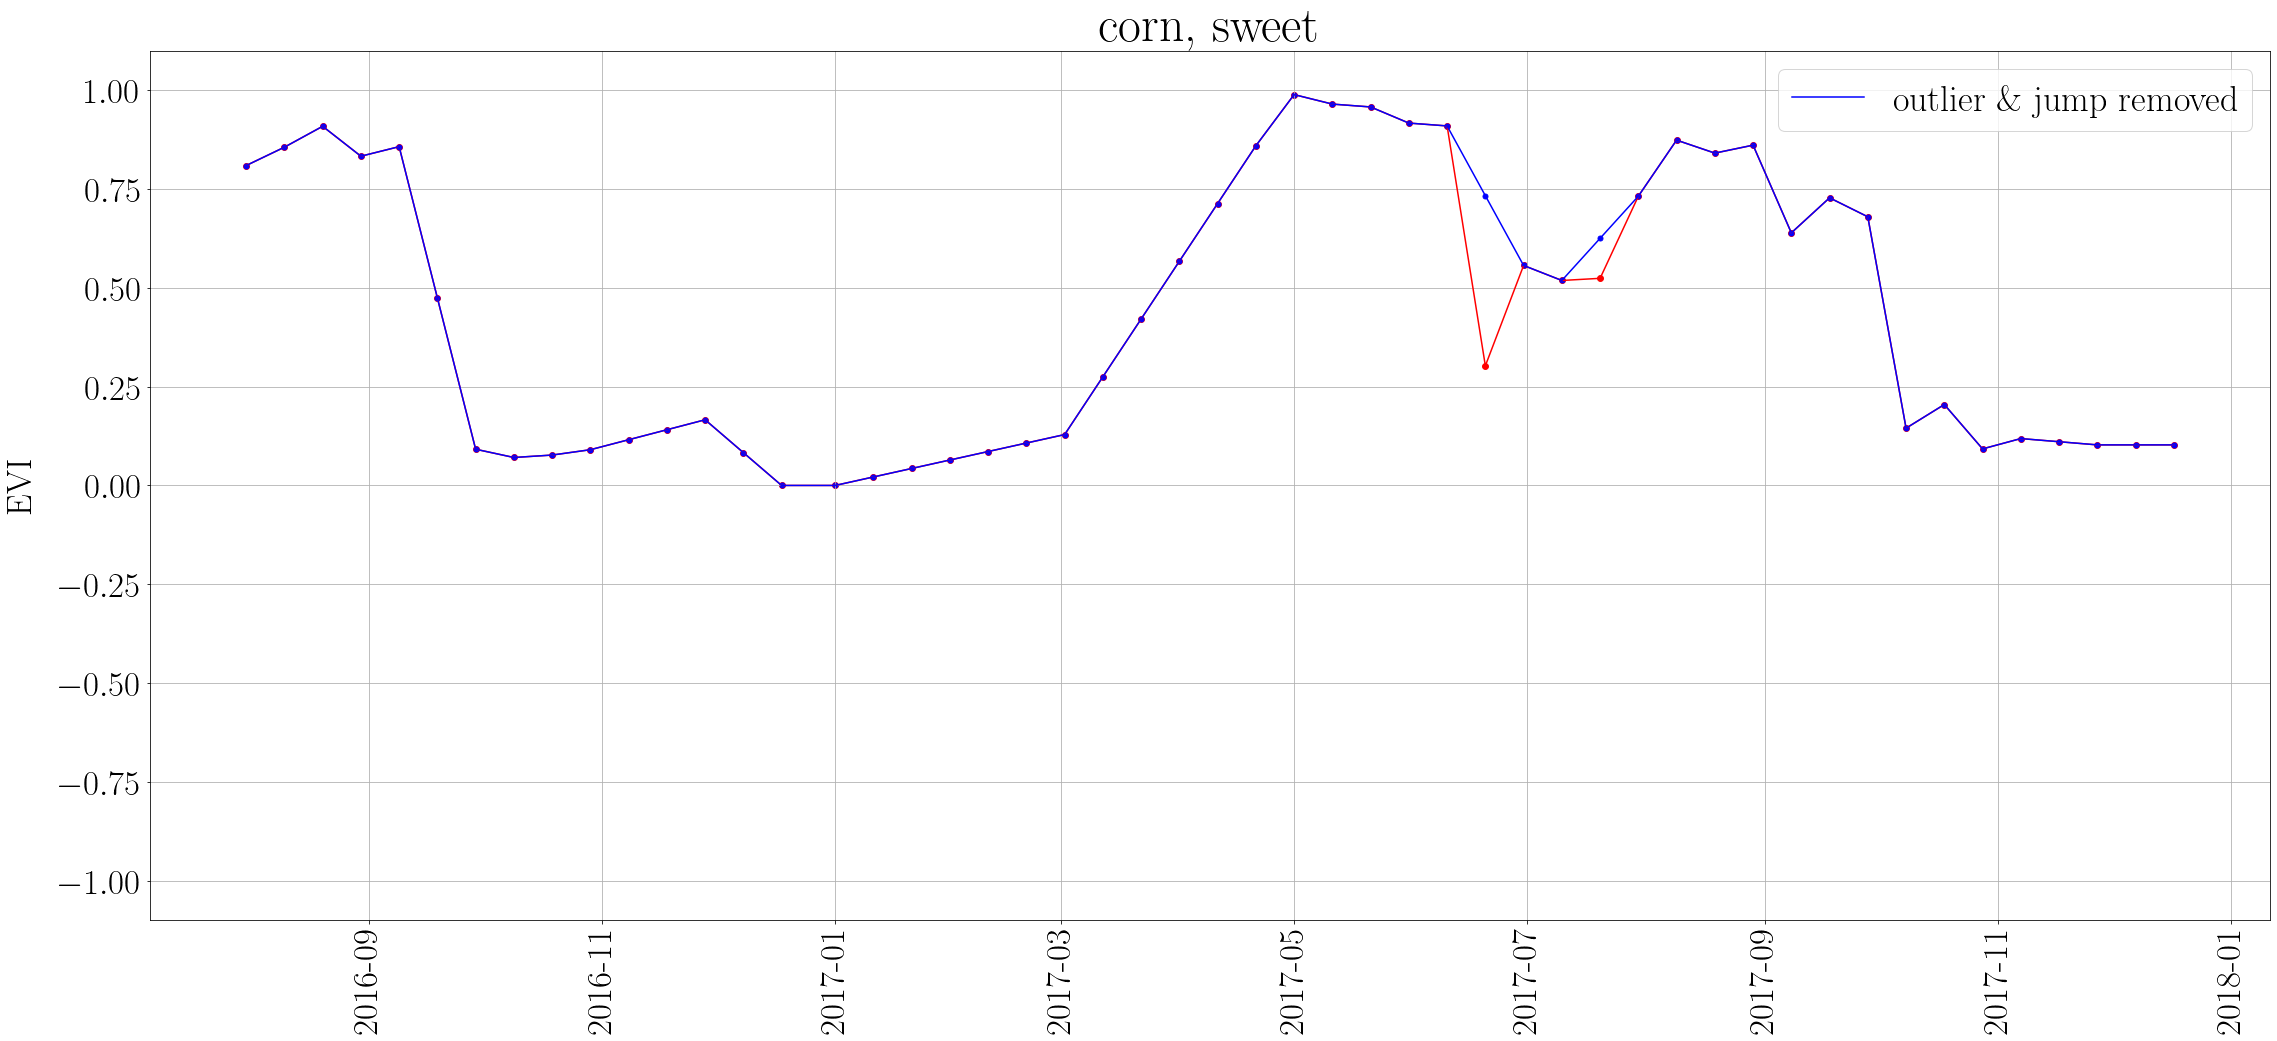

In [52]:
fig, ax = plt.subplots(figsize=(38, 16));
plot_title = one_field.CropTyp.unique()[0]

ax.plot(one_field['Date'], one_field['EVI'], c='r')
ax.scatter(one_field['Date'], one_field['EVI'], marker='o', s=35, c='r')

ax.plot(cleaned_field['Date'], cleaned_field['EVI'], c = 'b', label = "outlier \& jump removed")
ax.scatter(cleaned_field['Date'], cleaned_field['EVI'], marker='o', s=25, c='b')

ax.set_ylim([-1.1, 1.1])
ax.set_ylabel('EVI', fontsize = 35, labelpad = 20);
plt.xticks(rotation = 90)
ax.set_title(plot_title, fontsize = 50);

ax.legend(loc = "best", prop={'size': 36});
ax.grid(True)

In [58]:
one_field.loc[1, 'Date'] - one_field.loc[0, 'Date']
one_field.loc[2, 'Date'] - one_field.loc[1, 'Date']

Timedelta('10 days 00:00:00')